<a href="https://colab.research.google.com/github/Mohan1github/ML_projects/blob/main/Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import numpy as np
import pandas as pd

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df = pd.read_csv("SpotifyFeatures.csv")
df.shape

(232725, 18)

In [122]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [123]:

df.fillna(0, inplace=True)
df.isnull().sum()

,0
genre,0
artist_name,0
track_name,0
track_id,0
popularity,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0


In [124]:
df.tail()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489
232724,Soul,Mint Condition,You Don't Have To Hurt No More,34XO9RwPMKjbvRry54QzWn,35,0.09730,0.758,323027,0.470,0.000049,G#,0.0836,-6.708,Minor,0.0287,113.897,4/4,0.479


In [144]:
df = df.sample(n = 232725,random_state=42,replace= True).reset_index(drop=True)

df.head()


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Cluster
0,Alternative,Aaron Lewis,Country Boy (feat. George Jones & Charlie Dani...,77A7dWpSxVoauUbJn83Oj3,62,0.296000,0.595,283347,0.667,0.000,F#,0.109,-6.442,Major,0.0340,121.949,4/4,0.272,2.0
1,Hip-Hop,Waka Flocka Flame,Chris Paul John Wall (feat. Jimmy Rocket & Lei...,7AyUTunRfriSxK45FV5afF,54,0.070200,0.777,213626,0.558,0.000,C#,0.092,-8.838,Major,0.1980,90.996,4/4,0.407,2.0
2,R&B,Meghan Trainor,What If I,2Xd6Dy0x0MkfcGQ7Sqdkqi,48,0.447000,0.336,198493,0.515,0.000,D#,0.338,-8.404,Major,0.0438,185.454,3/4,0.270,2.0
3,Rap,Thousand Foot Krutch,Let the Sparks Fly,6bdt0GYvmh3lCMfZOMswfE,56,0.000554,0.645,246760,0.859,0.000,D,0.337,-4.904,Major,0.0562,120.063,4/4,0.596,0.0
4,Jazz,Joey Alexander,Draw Me Nearer,6vZ8PZZy7ljlQEgCPSZTAM,54,0.803000,0.698,282387,0.214,0.893,G,0.112,-15.785,Major,0.0378,121.769,4/4,0.172,1.0


In [145]:
df.shape

(232725, 19)

In [146]:
df.shape

(232725, 19)

In [147]:
from sklearn.preprocessing import StandardScaler
numerical_feature = [
    "valence","acousticness","popularity","duration_ms","energy",
    "instrumentalness","liveness","loudness","speechiness"
]

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_feature]),columns= numerical_feature)

df_scaled.fillna(0,inplace= True)
df_scaled.isnull().sum()

,0
valence,0
acousticness,0
popularity,0
duration_ms,0
energy,0
instrumentalness,0
liveness,0
loudness,0
speechiness,0


In [148]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')
train_data , test_data = train_test_split(df_scaled,test_size = 0.2,random_state=42)
imputer.fit(train_data)

train_data_filled = pd.DataFrame(imputer.transform(train_data), columns=train_data.columns)

train_data_filled
print(train_data.shape)
test_data.shape


(186180, 9)


(46545, 9)

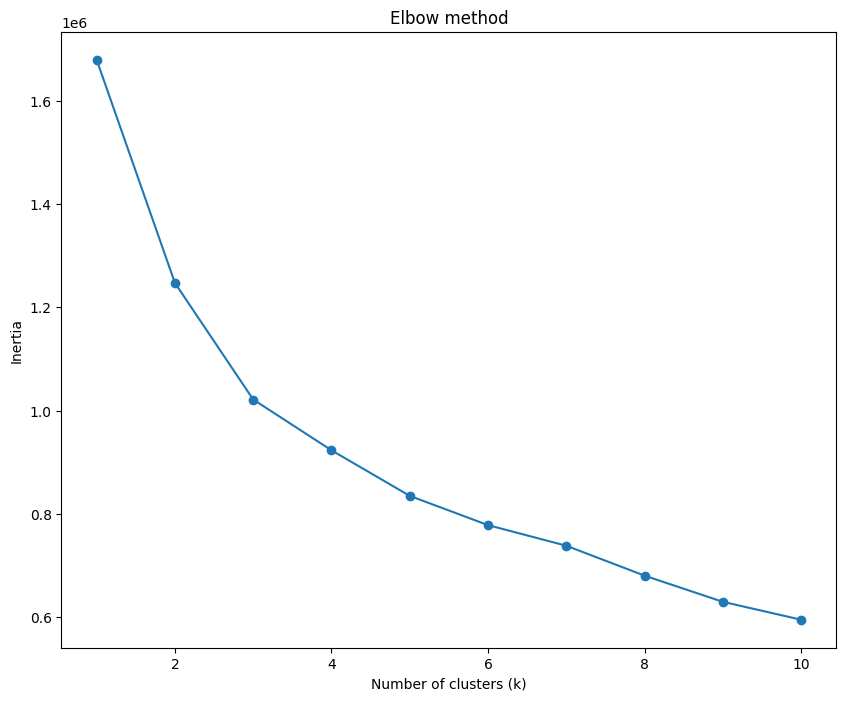

In [149]:
from sklearn.cluster import KMeans
inertia = []
k_values = range(1,11)

for k in k_values:
  kmeans = KMeans(n_clusters = k,random_state = 42)
  kmeans.fit(train_data_filled)
  inertia.append(kmeans.inertia_)


plt.figure(figsize = (10,8))
plt.plot(k_values , inertia, marker = 'o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

In [152]:
optimal_k  = 6
kmeans = KMeans(n_clusters = optimal_k , random_state = 42)

cluster = kmeans.fit_predict(train_data_filled)
df.loc[train_data.index, "Cluster"] = cluster
df["Cluster"].value_counts()
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Cluster
0,Alternative,Aaron Lewis,Country Boy (feat. George Jones & Charlie Dani...,77A7dWpSxVoauUbJn83Oj3,62,0.296000,0.595,283347,0.667,0.000,F#,0.109,-6.442,Major,0.0340,121.949,4/4,0.272,2.0
1,Hip-Hop,Waka Flocka Flame,Chris Paul John Wall (feat. Jimmy Rocket & Lei...,7AyUTunRfriSxK45FV5afF,54,0.070200,0.777,213626,0.558,0.000,C#,0.092,-8.838,Major,0.1980,90.996,4/4,0.407,2.0
2,R&B,Meghan Trainor,What If I,2Xd6Dy0x0MkfcGQ7Sqdkqi,48,0.447000,0.336,198493,0.515,0.000,D#,0.338,-8.404,Major,0.0438,185.454,3/4,0.270,2.0
3,Rap,Thousand Foot Krutch,Let the Sparks Fly,6bdt0GYvmh3lCMfZOMswfE,56,0.000554,0.645,246760,0.859,0.000,D,0.337,-4.904,Major,0.0562,120.063,4/4,0.596,0.0
4,Jazz,Joey Alexander,Draw Me Nearer,6vZ8PZZy7ljlQEgCPSZTAM,54,0.803000,0.698,282387,0.214,0.893,G,0.112,-15.785,Major,0.0378,121.769,4/4,0.172,1.0


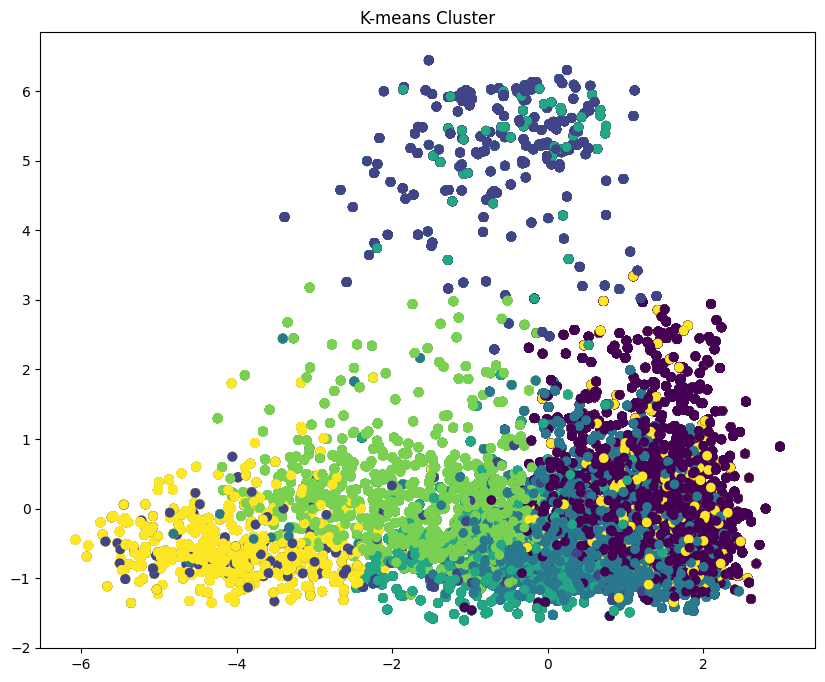

In [153]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2 )

pca_result = pca.fit_transform(df_scaled)
plt.figure(figsize = (10,8))
plt.scatter(pca_result[:,0],pca_result[:,1],c = df['Cluster'] ,cmap= "viridis")
plt.title("K-means Cluster")
plt.show()

In [160]:
from sklearn.metrics.pairwise import cosine_similarity

# def song_recommendation(song_name,df,num_recommendation):
#   song_cluster = df[df["track_name"] == song_name]["Cluster"].values[0]

#   same_cluster_songs = df[df["Cluster"]== song_cluster]

#   song_index = same_cluster_songs[same_cluster_songs["track_name"] == song_name].index[0]
#   cluster_feature = same_cluster_songs[numerical_feature]


#   similarity_scores = cosine_similarity(cluster_feature,cluster_feature)

#   similar_songs = np.argsort(similarity_scores[song_index])[-(num_recommendation + 1 ):-1]
#   recommendation =  same_cluster_songs.iloc[similar_songs][["track_name","year","artists"]]
#   return recommendation




import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def song_recommendation(song_name, df, num_recommendation, numerical_feature):

    song_cluster_series = df[df["track_name"] == song_name]["Cluster"]

    if song_cluster_series.empty:
        raise ValueError(f"Error: '{song_name}' not found in the dataset.")


    song_cluster = song_cluster_series.iloc[0]

    same_cluster_songs = df[df["Cluster"] == song_cluster]


    song_index_series = same_cluster_songs[same_cluster_songs["track_name"] == song_name].index

    if song_index_series.empty:
        raise ValueError(f"Error: '{song_name}' not found in the clustered songs.")

    song_index = song_index_series[0]


    cluster_feature = same_cluster_songs[numerical_feature]

    if cluster_feature.empty:
        raise ValueError("Error: No numerical features found for similarity computation.")


    similarity_scores = cosine_similarity(cluster_feature, cluster_feature)


    similar_songs = np.argsort(similarity_scores[song_index])[-(num_recommendation + 1):-1]


    recommendation = same_cluster_songs.iloc[similar_songs][["track_name", "year", "artists"]]

    return recommendation


In [159]:
input_song = "Chris Paul John Wall (feat. Jimmy Rocket & Lei..)"
recommendation_songs = song_recommendation(input_song,df,5,numerical_feature)
print(f"Recommended songs for {input_song}:")
print(recommendation_songs)

ValueError: Error: 'Chris Paul John Wall (feat. Jimmy Rocket & Lei..)' not found in the dataset.